In [1]:
import os

import tensorflow as tf
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from keras_tuner.tuners import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters
from PIL import Image

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def load_and_preprocess_image(file_path, target_size=(128, 128)):
    '''images
    Preprocesses the incoming images
    
    Parameters:
    file_path (string): Path where the images is stored

    Returns:
    array: an array which represents the images in a numarical form
    '''
    image = Image.open(file_path)
    image = image.resize(target_size) 
    image = image.convert('RGB') 
    image_array = np.array(image)  
    return image_array

In [3]:
image_list = []
brand_list = []

image_folder = '/kaggle/input/the-car-connection-picture-dataset'
brand_mapping = {
    'chevrolet': 'Chevrolet',
    'ford': 'Ford',
    'nissan': 'Nissan',
    'toyota': 'Toyota'
}

for filename in os.listdir(image_folder):
    file_path = os.path.join(image_folder, filename)
    image_array = load_and_preprocess_image(file_path)
    car_brand = filename.split('_')[0].strip().lower()  # convert to lowercase for case-insensitive check
    
    # Check if the brand is in the mapping dictionary
    if car_brand in brand_mapping:
        brand = brand_mapping[car_brand]
        image_list.append(image_array)
        brand_list.append(brand)

# Create the DataFrame after the loop
data = {'Image': image_list, 'Brand': brand_list}
cars_df = pd.DataFrame(data)


In [4]:
image_list = []
brand_list = []
image_limit_per_brand = 3000

image_folder = '/kaggle/input/the-car-connection-picture-dataset'
brand_mapping = {
    'chevrolet': 'Chevrolet',
    'ford': 'Ford',
    'nissan': 'Nissan',
    'toyota': 'Toyota'
}

# Counter for each brand
brand_counts = {brand: 0 for brand in brand_mapping.values()}

for filename in os.listdir(image_folder):
    file_path = os.path.join(image_folder, filename)
    image_array = load_and_preprocess_image(file_path)
    car_brand = filename.split('_')[0].strip().lower()  # convert to lowercase for case-insensitive check
    
    # Check if the brand is in the mapping dictionary
    if car_brand in brand_mapping:
        brand = brand_mapping[car_brand]
        
        # Check if the image count for this brand is less than the limit
        if brand_counts[brand] < image_limit_per_brand:
            image_list.append(image_array)
            brand_list.append(brand)
            brand_counts[brand] += 1

# Create the DataFrame after the loop
data = {'Image': image_list, 'Brand': brand_list}
cars_df = pd.DataFrame(data)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


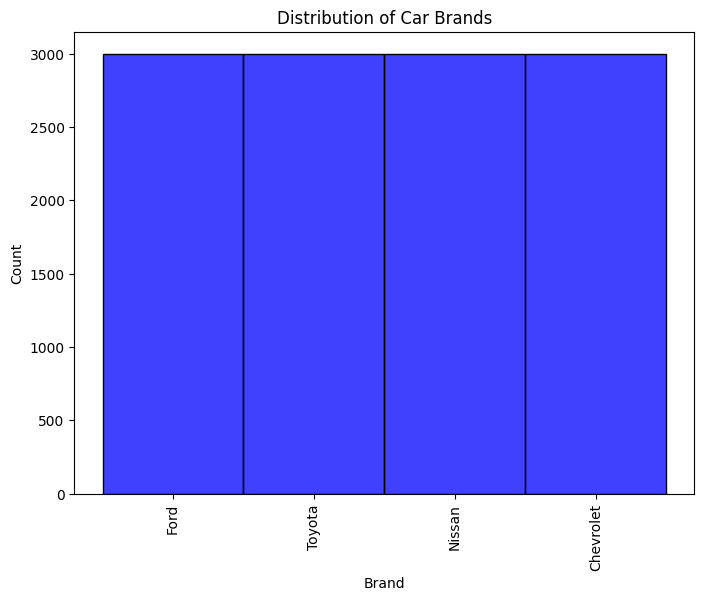

In [5]:
import matplotlib.pyplot as plt

# Plot histogram for the 'Brand' column
plt.figure(figsize=(8, 6))
sns.histplot(cars_df['Brand'], bins=4, kde=False, color='blue', edgecolor='black')
plt.title('Distribution of Car Brands')
plt.xlabel('Brand')
plt.xticks(rotation='vertical')
plt.ylabel('Count')
plt.show()

In [6]:
brand_counts = cars_df.groupby('Brand').count()
brand_counts

,Image
Brand,
Chevrolet,3000
Ford,3000
Nissan,3000
Toyota,3000


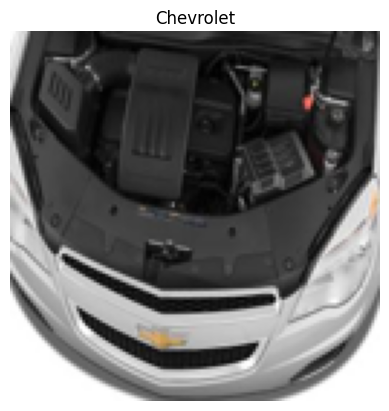

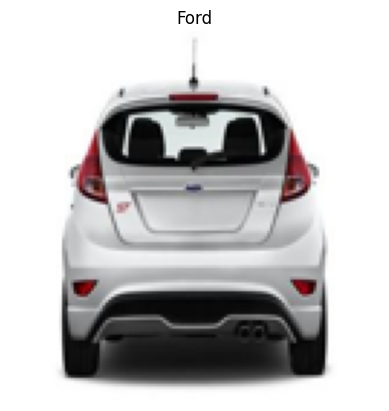

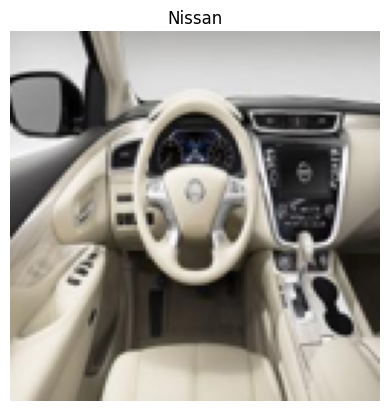

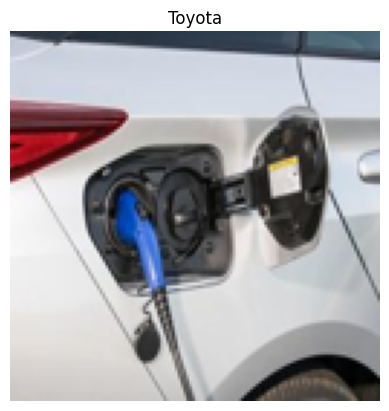

In [7]:
grouped = cars_df.groupby('Brand')

for brand, group_data in grouped:
    first_image = group_data.iloc[0]['Image']
    
    plt.figure()
    plt.imshow(first_image)
    plt.title(brand)
    plt.axis('off')

plt.show()

In [8]:
#sample for later
unique_test_samples = cars_df.groupby('Brand').sample(n=1, random_state=69)
unique_test_df = unique_test_samples[['Image', 'Brand']]
unique_test = np.array(unique_test_df['Image'].to_list()) / 255.0
unique_answer = np.array(unique_test_df['Brand'].to_list())
cars_df = cars_df.drop(unique_test_samples.index)

train_df, test_df = train_test_split(cars_df, test_size=0.2, random_state=69, stratify=cars_df['Brand'])

X_train = np.array(train_df['Image'].to_list()) / 255.0
X_test = np.array(test_df['Image'].to_list()) / 255.0

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_df['Brand'])
y_test = label_encoder.transform(test_df['Brand'])




/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

In [9]:
from sklearn.metrics import mean_squared_error
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K


# Define the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), input_shape=(128, 128, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(rescale=1./255)

# Define batch size
batch_size = 4

n_splits = 3
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=69)

histories = []
accuracies = []
all_predictions = []
all_true_labels = []

# Loop through folds
for train_index, val_index in kf.split(X_train, y_train):
    print('-------------------- New Fold --------------------')

    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Create generators for training and validation
    train_generator = datagen.flow(X_train_fold, y_train_fold, batch_size=batch_size)
    val_generator = datagen.flow(X_val_fold, y_val_fold, batch_size=batch_size)

    # Train the model using fit_generator
    history = model.fit(
        train_generator,
        steps_per_epoch=len(X_train_fold) // batch_size,
        epochs=5,
        validation_data=val_generator,
        validation_steps=len(X_val_fold) // batch_size,
        verbose=1
    )
    histories.append(history)

    # Make predictions on the validation set
    y_pred = model.predict(X_val_fold)

    # Convert softmax predictions to class labels
    y_pred_labels = np.argmax(y_pred, axis=1)

    # Store predictions and true labels
    all_predictions.extend(y_pred_labels)
    all_true_labels.extend(y_val_fold)

    val_accuracy = model.evaluate(val_generator, steps=len(X_val_fold) // batch_size)
    accuracies.append(val_accuracy)
    
    K.clear_session()
    model.stop_training = True

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(all_true_labels, all_predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')


-------------------- New Fold --------------------
Epoch 1/5
1599/1599 [==============================] - 19s 7ms/step - loss: 1.3870 - accuracy: 0.2426 - val_loss: 1.3863 - val_accuracy: 0.2503
Epoch 2/5
1599/1599 [==============================] - 11s 7ms/step - loss: 1.3865 - accuracy: 0.2518 - val_loss: 1.3865 - val_accuracy: 0.2500
Epoch 3/5
1599/1599 [==============================] - 11s 7ms/step - loss: 1.3867 - accuracy: 0.2435 - val_loss: 1.3863 - val_accuracy: 0.2497
Epoch 4/5
1599/1599 [==============================] - 11s 7ms/step - loss: 1.3866 - accuracy: 0.2479 - val_loss: 1.3864 - val_accuracy: 0.2494
Epoch 5/5
799/799 [==============================] - 3s 3ms/step - loss: 1.3863 - accuracy: 0.2503
-------------------- New Fold --------------------
Epoch 1/5
1599/1599 [==============================] - 11s 7ms/step - loss: 1.3866 - accuracy: 0.2456 - val_loss: 1.3864 - val_accuracy: 0.2500
Epoch 2/5
1599/1599 [==============================] - 11s 7ms/step - loss: 1.3

In [10]:
from sklearn.metrics import mean_squared_error
from keras.callbacks import LearningRateScheduler
import gc

gc.collect()

# Assuming X_train and y_train are already defined

# Create an array to store predictions and true labels
all_predictions = []
all_true_labels = []

# Define the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), input_shape=(128, 128, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

n_splits = 5
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=69)

def lr_schedule(epoch):
    lr = 1e-4
    if epoch > 10:
        lr *= 0.1
    elif epoch > 5:
        lr *= 0.5
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)

histories = []
accuracies = []
# Loop through folds
for train_index, val_index in kf.split(X_train, y_train):
    print('-------------------- New Fold --------------------')

    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Train the model
    history = model.fit(X_train_fold, y_train_fold, epochs=15, verbose=1, validation_data=(X_val_fold, y_val_fold), callbacks=[lr_scheduler])
    histories.append(history)
    
    # Make predictions on the validation set
    y_pred = model.predict(X_val_fold)

    # Convert softmax predictions to class labels
    y_pred_labels = np.argmax(y_pred, axis=1)

    # Store predictions and true labels
    all_predictions.extend(y_pred_labels)
    all_true_labels.extend(y_val_fold)
    
    val_accuracy = model.evaluate(X_val_fold, y_val_fold, verbose=0)[1]
    accuracies.append(val_accuracy)
    gc.collect()

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(all_true_labels, all_predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')

-------------------- New Fold --------------------
Epoch 1/15
240/240 [==============================] - 5s 15ms/step - loss: 1.4285 - accuracy: 0.2708 - val_loss: 1.3715 - val_accuracy: 0.2771 - lr: 1.0000e-04
Epoch 2/15
240/240 [==============================] - 2s 9ms/step - loss: 1.3449 - accuracy: 0.3257 - val_loss: 1.3325 - val_accuracy: 0.3505 - lr: 1.0000e-04
Epoch 3/15
240/240 [==============================] - 2s 9ms/step - loss: 1.2911 - accuracy: 0.3997 - val_loss: 1.3028 - val_accuracy: 0.4016 - lr: 1.0000e-04
Epoch 4/15
240/240 [==============================] - 2s 9ms/step - loss: 1.2406 - accuracy: 0.4526 - val_loss: 1.2729 - val_accuracy: 0.4344 - lr: 1.0000e-04
Epoch 5/15
240/240 [==============================] - 2s 9ms/step - loss: 1.1892 - accuracy: 0.5039 - val_loss: 1.2453 - val_accuracy: 0.4380 - lr: 1.0000e-04
Epoch 6/15
240/240 [==============================] - 2s 10ms/step - loss: 1.1372 - accuracy: 0.5393 - val_loss: 1.2233 - val_accuracy: 0.4839 - lr: 1.00

In [11]:
from sklearn.metrics import mean_squared_error
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
from keras.layers import Dropout
from keras import regularizers
import gc
gc.collect()

# Assuming X_train and y_train are already defined
# Create an array to store predictions and true labels
all_predictions = []
all_true_labels = []

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rescale=1./255  # Normalization
)

# Learning Rate Schedule
def lr_schedule(epoch):
    lr = 1e-2
    if epoch > 10:
        lr *= 0.1
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)

# Define the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), input_shape=(128, 128, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-4)),
    layers.Dropout(0.5),  # Dropout for regularization
    layers.Dense(4, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

n_splits = 2
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=69)

batch_size = 32
histories = []
accuracies = []

# Loop through folds
for train_index, val_index in kf.split(X_train, y_train):
    print('-------------------- New Fold --------------------')

    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Create generators for training and validation with data augmentation
    train_generator = datagen.flow(X_train_fold, y_train_fold, batch_size=batch_size)
    val_generator = datagen.flow(X_val_fold, y_val_fold, batch_size=batch_size)

    # Train the model with data augmentation and learning rate scheduling
    history = model.fit(
        train_generator,
        epochs=5,
        verbose=1,
        validation_data=val_generator,
        callbacks=[lr_scheduler]
    )
    histories.append(history)

    # Make predictions on the validation set
    y_pred = model.predict(X_val_fold)

    # Convert softmax predictions to class labels
    y_pred_labels = np.argmax(y_pred, axis=1)

    # Store predictions and true labels
    all_predictions.extend(y_pred_labels)
    all_true_labels.extend(y_val_fold)

    val_accuracy = model.evaluate(val_generator)[1]
    accuracies.append(val_accuracy)
    
    gc.collect()

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(all_true_labels, all_predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')


-------------------- New Fold --------------------
Epoch 1/5
150/150 [==============================] - 34s 218ms/step - loss: 1.6158 - accuracy: 0.2434 - val_loss: 1.3916 - val_accuracy: 0.2499 - lr: 0.0100
Epoch 2/5
150/150 [==============================] - 33s 218ms/step - loss: 1.3884 - accuracy: 0.2436 - val_loss: 1.3869 - val_accuracy: 0.2501 - lr: 0.0100
Epoch 3/5
150/150 [==============================] - 33s 220ms/step - loss: 1.3875 - accuracy: 0.2328 - val_loss: 1.3863 - val_accuracy: 0.2501 - lr: 0.0100
Epoch 4/5
150/150 [==============================] - 33s 218ms/step - loss: 1.3871 - accuracy: 0.2430 - val_loss: 1.3864 - val_accuracy: 0.2499 - lr: 0.0100
Epoch 5/5
150/150 [==============================] - 17s 110ms/step - loss: 1.3865 - accuracy: 0.2501
-------------------- New Fold --------------------
Epoch 1/5
150/150 [==============================] - 33s 222ms/step - loss: 1.3874 - accuracy: 0.2464 - val_loss: 1.3871 - val_accuracy: 0.2499 - lr: 0.0100
Epoch 2/5
1

<h1 id="Training Visualization" style="border:#b305f2; border-width:3px; border-style:solid;padding:15px;text-align:center;border-radius:50px">Training Visualization</h1> 

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 127008)            0         
                                                                 
 dense_2 (Dense)             (None, 128)               16257152  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 516       
                                                      

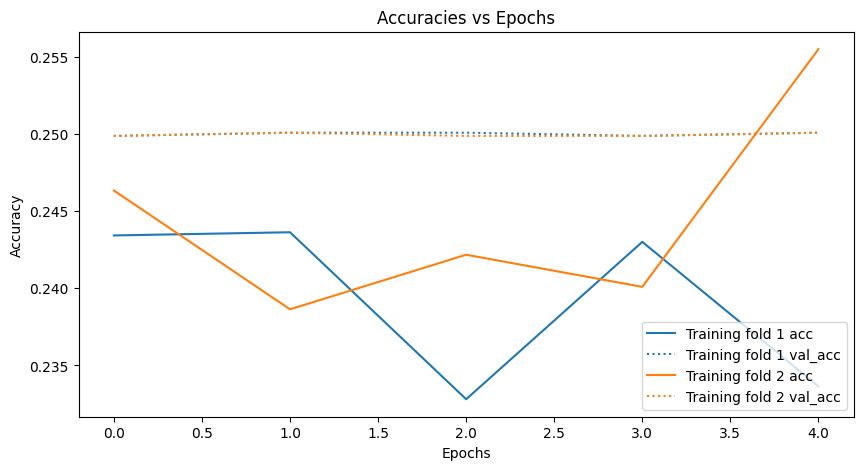

In [13]:
plt.figure(figsize=(10, 5))
plt.title('Accuracies vs Epochs')

for i, history in enumerate(histories):
    plt.plot(history.history['accuracy'], label=f'Training fold {i+1} acc')
    plt.plot(
        history.history['val_accuracy'], 
        linestyle='dotted', 
        color=plt.gca().lines[-1].get_color(),
        label=f'Training fold {i+1} val_acc'
    )

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

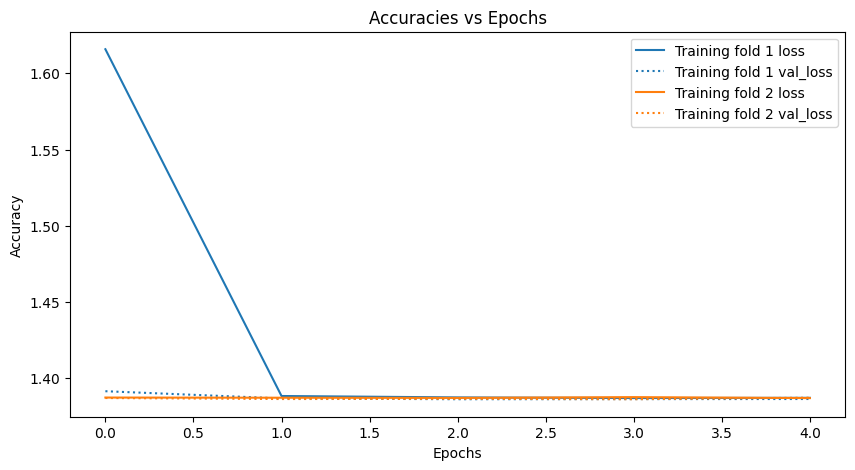

In [14]:
plt.figure(figsize=(10, 5))
plt.title('Accuracies vs Epochs')

for i, history in enumerate(histories):
    plt.plot(history.history['loss'], label=f'Training fold {i+1} loss')
    plt.plot(
        history.history['val_loss'], 
        linestyle='dotted', 
        color=plt.gca().lines[-1].get_color(),
        label=f'Training fold {i+1} val_loss'
    )

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.show()

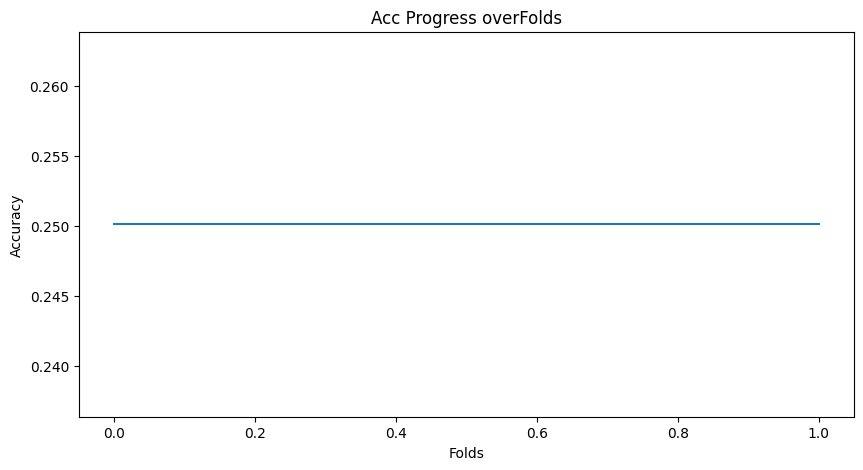

In [15]:
plt.figure(figsize=(10, 5))
plt.title('Acc Progress overFolds')

plt.plot(accuracies)

plt.xlabel('Folds')
plt.ylabel('Accuracy')
plt.show()

<h1 id="Testing" style="border:#b305f2; border-width:3px; border-style:solid;padding:15px;text-align:center;border-radius:50px">Testing</h1> 

In [16]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss:.4f}')

75/75 - 0s - loss: 1.3873 - accuracy: 0.2500 - 360ms/epoch - 5ms/step
Test Accuracy: 25.00%
Test Loss: 1.3873


75/75 [==============================] - 0s 4ms/step


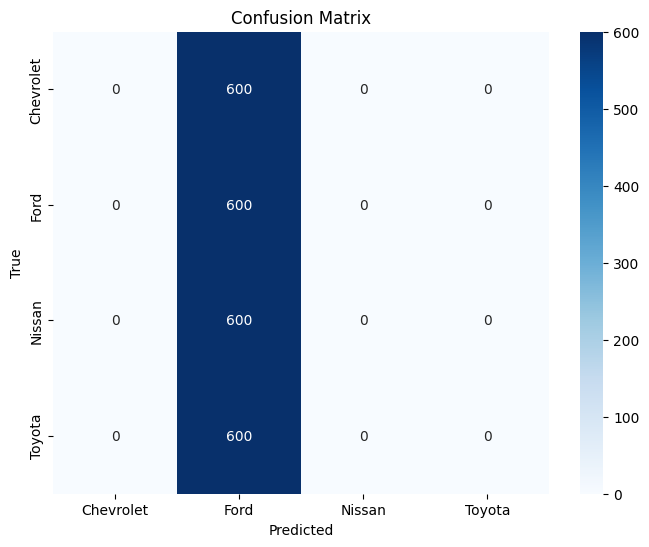

In [17]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

confusion_mtx = confusion_matrix(y_test, y_pred_classes)

class_labels = ['Chevrolet', 'Ford', 'Nissan', 'Toyota']

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

<h1 id="Unique_Tests" style="border:#b305f2; border-width:3px; border-style:solid;padding:15px;text-align:center;border-radius:50px">Unique Tests</h1> 

1/1 [==============================] - 0s 19ms/step


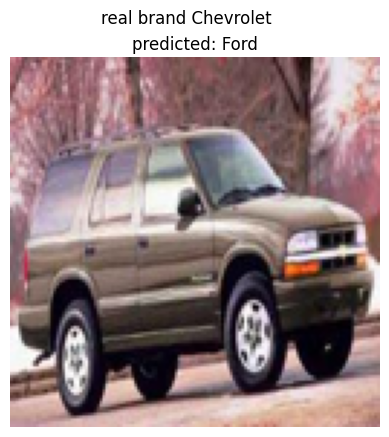

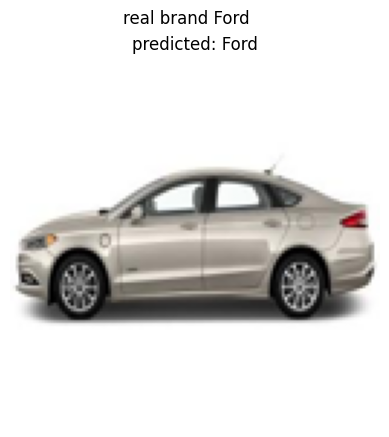

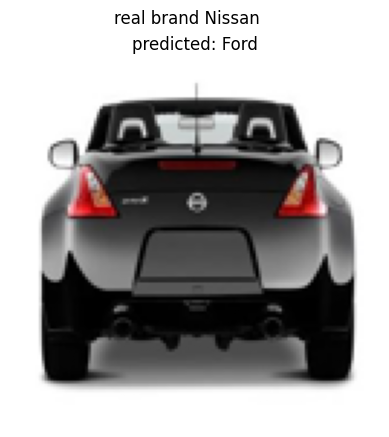

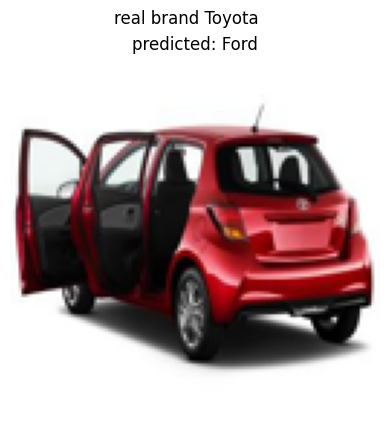

In [18]:
y_u_pred = model.predict(unique_test)
y_u_pred_classes = np.argmax(y_u_pred, axis=1)
for car, brand, real_brand in zip(unique_test, y_u_pred_classes, unique_answer):
    
    # decoding
    if brand == 0:
        answer = 'Chevrolet'
    if brand == 1:
        answer = 'Ford'
    if brand == 2:
        answer = 'Nissan'
    if brand == 3:
        answer = 'Toyota'
        
    plt.figure()
    plt.imshow(car)
    plt.title(f'predicted: {answer}')
    plt.suptitle(f'real brand {real_brand}')
    plt.axis('off')
    plt.show()

<h1 id="Summary" style="border:#b305f2; border-width:3px; border-style:solid;padding:15px;text-align:center;border-radius:50px">Summary</h1>

- **The performance of the 'Porsche' brand classification is not as strong, primarily due to the limited amount of available data for this brand.**

- **'Volkswagen' shows better classification results, while 'Mercedes' and 'Audi' outperform the others. This superior performance is attributed to the availability of a larger dataset, comprising approximately 3000 images for each brand.**

- **Achieving an accuracy of around 68% is considered quite good in this context. This is particularly noteworthy because the dataset is not only limited in size but also contains challenging images, such as those with poor lighting conditions or unfavorable angles, making car classification a task suited for extreme car enthusiasts.**

- **It's important to note that the model was developed with the constraint of maximizing RAM capacity, and the highest possible image resolution used was 128x128 pixels.**

- **Considering these constraints and challenges, the achieved results can be deemed satisfactory. Despite limitations in data and image quality, the model demonstrates robust performance for the given conditions.**


In [19]:
import gc
K.clear_session()
gc.collect()


16734